In [1]:
import yfinance as yf
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Click [here](https://www.tutorialspoint.com/what-is-the-best-way-to-get-stock-data-using-python#:~:text=One%20of%20the%20best%20platforms,yfinance%20library%20and%20Python%20programming.) for documentation on yahoo finance

In [2]:
def getHistoricalData(startDate, endDate, ticker):
    """
    Example => 
    
    startDate = '2015-03-01'
    endDate = '2017-03-01'
    ticker = 'GOOGL'
    
    """
    resultData = yf.download(ticker, startDate, endDate)
    resultData["Date"] = resultData.index
    resultData = resultData[["Date", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
    resultData.reset_index(drop=True, inplace=True)
    return resultData

def getLiveData(ticker):
    resultData = yf.Ticker(ticker).info
    return resultData

In [3]:
df = getHistoricalData('2009-01-01', '2023-01-01', 'TSLA') # You can try it for any company during any time period

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3145,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
3146,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
3147,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
3148,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [5]:
df.loc[df['Date'] <= '2015-01-05']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
1133,2014-12-29,15.126667,15.194000,14.934667,15.047333,15.047333,42037500
1134,2014-12-30,14.932667,15.043333,14.760000,14.815333,14.815333,43548000
1135,2014-12-31,14.872667,15.045333,14.816667,14.827333,14.827333,34462500
1136,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df["Avg. Money Regulated"] = (df["Low"] + ((df["High"] - df["Low"])/2))*df["Volume"]

/tmp/ipykernel_26643/4065462845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avg. Money Regulated"] = (df["Low"] + ((df["High"] - df["Low"])/2))*df["Volume"]


In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Avg. Money Regulated
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,3.991592e+08
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,4.616455e+08
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.898132e+08
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.074475e+08
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.230205e+08
...,...,...,...,...,...,...,...,...
3145,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2.084365e+10
3146,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2.383021e+10
3147,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2.481627e+10
3148,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2.674952e+10


In [9]:
df.drop(["Adj Close", "Date"], axis = 1, inplace = True)

/tmp/ipykernel_26643/2538567002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Adj Close", "Date"], axis = 1, inplace = True)


In [10]:
df

,Open,High,Low,Close,Volume,Avg. Money Regulated
0,1.266667,1.666667,1.169333,1.592667,281494500,3.991592e+08
1,1.719333,2.028000,1.553333,1.588667,257806500,4.616455e+08
2,1.666667,1.728000,1.351333,1.464000,123282000,1.898132e+08
3,1.533333,1.540000,1.247333,1.280000,77097000,1.074475e+08
4,1.333333,1.333333,1.055333,1.074000,103003500,1.230205e+08
...,...,...,...,...,...,...
3145,126.370003,128.619995,121.019997,123.150002,166989700,2.084365e+10
3146,117.500000,119.669998,108.760002,109.099998,208643400,2.383021e+10
3147,110.349998,116.269997,108.239998,112.709999,221070500,2.481627e+10
3148,120.389999,123.570000,117.500000,121.820000,221923300,2.674952e+10


In [11]:
X = df[df.columns.drop('Close')]
Y = df["Close"]

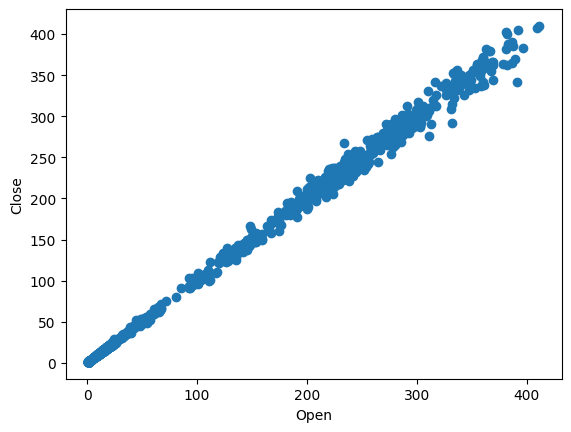

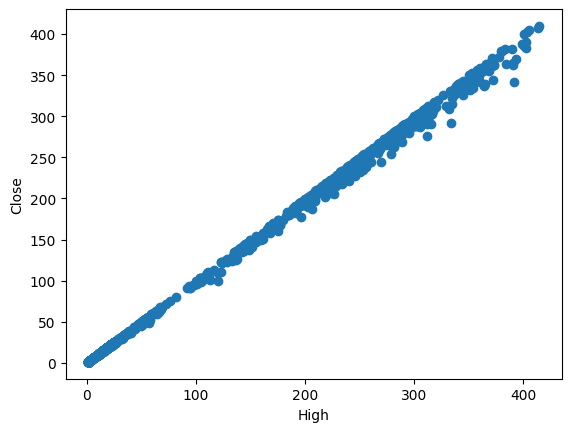

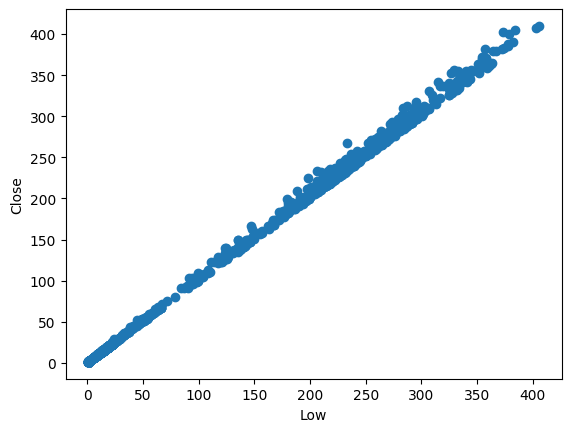

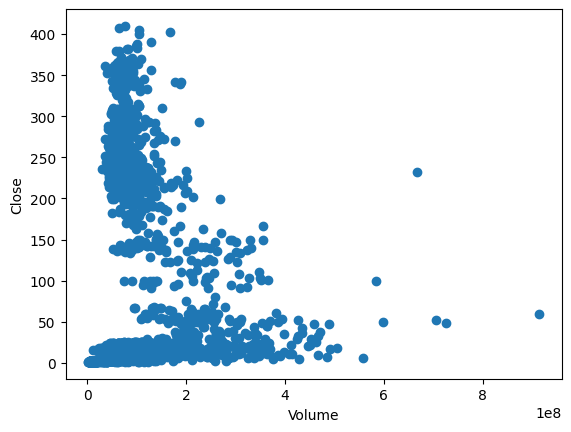

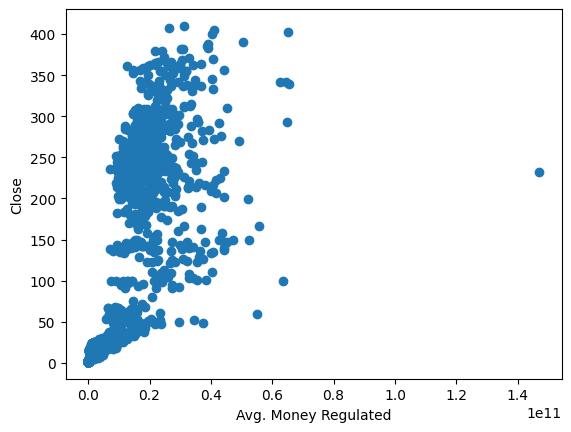

In [12]:
for column in X.columns:
    plt.scatter(X[column], Y)
    plt.xlabel(column)
    plt.ylabel("Close")
    plt.show()

In [13]:
# Dropping "Volume" as it's relationnship with "Close" doesn't seem linear
X.drop(["Volume"], axis = 1, inplace = True)
X

/tmp/ipykernel_26643/1335277265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Volume"], axis = 1, inplace = True)


,Open,High,Low,Avg. Money Regulated
0,1.266667,1.666667,1.169333,3.991592e+08
1,1.719333,2.028000,1.553333,4.616455e+08
2,1.666667,1.728000,1.351333,1.898132e+08
3,1.533333,1.540000,1.247333,1.074475e+08
4,1.333333,1.333333,1.055333,1.230205e+08
...,...,...,...,...
3145,126.370003,128.619995,121.019997,2.084365e+10
3146,117.500000,119.669998,108.760002,2.383021e+10
3147,110.349998,116.269997,108.239998,2.481627e+10
3148,120.389999,123.570000,117.500000,2.674952e+10


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred = reg.predict(X_test)
print('Coefficients:', reg.coef_, "\n")
print(f"Accuracy : {round(r2_score(Y_test, Y_pred)*100, 2)}%")

Coefficients: [-6.41160038e-01  8.13653090e-01  8.25927699e-01  3.56327190e-11] 

Accuracy : 99.98%
